In [1]:
import sys
import os

# 获取项目根目录（即 `debug/` 目录的上一级）
project_root = os.path.abspath("..")  # 假设 `debug/` 目录是你的工作目录

# 添加 `project_root` 到 sys.path
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from src.param_periodic_koopman import ParamBlockDiagonalKoopmanWithInputs

In [2]:
import numpy as np
import torch

In [3]:
from src.data import get_evaluation_dataset
from src.args import parse_arguments, read_config_file

config_dir = "/home/shiqi/code/Project2-sensor-case/field-circuit-param-periodic-koopman/configs/Similar/experiment_1_same.yaml"
config = read_config_file(config_dir)


In [4]:
data_dir = config["data_dir"]
step_size = config["step_size"]
pca_dim = config["pca_dim"]
state_dim = pca_dim
inputs_dim = 2
params_dim = 2
model = ParamBlockDiagonalKoopmanWithInputs(state_dim, config["dictionary_dim"], inputs_dim, params_dim, config["dictionary_layers"], config["A_layers"], config["B_layers"])

In [5]:
device = torch.device('cpu')
# model_dict = torch.load(os.path.join(config["save_dir"], "model_state_dict.pth"))
# model.load_state_dict(model_dict)
model.to(device)
model.B_matrix.resnet.initialize_weights_to_zero()


In [23]:
from src.eval_param_periodic import evaluate_model, get_evaluation_dataset
data_list_train, params_list_train, inputs_list_train, data_list_test, params_list_test, inputs_list_test, dataset = get_evaluation_dataset(config['data_dir'], config['save_dir'], config['validation_split'])
print(data_list_train[0])
data_list_train, data_pred_list_train = evaluate_model(model, data_list_train, params_list_train, inputs_list_train, dataset, config['sample_step'])
# data_list_test, data_pred_list_test = evaluate_model(model, data_list_test, params_list_test, inputs_list_test, dataset, config['sample_step'])


[[-5.39698550e-03  1.08538980e-01 -2.44679131e-01 ... -2.27899566e-02
  -2.21312520e-02  1.56152334e-01]
 [-4.94983425e-03  1.03817959e-01 -2.34763757e-01 ... -2.07779054e-02
  -2.02598340e-02  1.45728717e-01]
 [-4.31389296e-03  9.60562641e-02 -2.18196101e-01 ... -1.81397418e-02
  -1.77785461e-02  1.31044435e-01]
 ...
 [-3.62309584e-04  5.97464628e-02 -1.39036001e-01 ... -5.12728548e-03
  -5.53645674e-03  5.93713683e-02]
 [ 2.19120261e-04  5.34997194e-02 -1.25014979e-01 ... -3.35683245e-03
  -3.83761086e-03  4.74444021e-02]
 [ 7.15115357e-04  4.77764899e-02 -1.12080166e-01 ... -1.84937991e-03
  -2.38184727e-03  3.66840266e-02]]
Evaluation started...

=== Processing sample 1/16 ===
Data shape: torch.Size([150, 6957]), Params shape: torch.Size([149, 2]), Inputs shape: torch.Size([150, 2])
Initial data shape before PCA: torch.Size([1, 6957])
Initial data shape after PCA: torch.Size([1, 4])
Params_scaled shape: torch.Size([149, 2]), Inputs_scaled shape: torch.Size([150, 2])
Initial diction

In [24]:
print(dataset.params_std)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1

In [25]:
print(params_list_test[0])

[[1000.     1.2]
 [1000.     1.2]
 [1000.     1.2]
 [1000.     1.2]
 [1000.     1.2]
 [1000.     1.2]
 [1000.     1.2]
 [1000.     1.2]
 [1000.     1.2]
 [1000.     1.2]
 [1000.     1.2]
 [1000.     1.2]
 [1000.     1.2]
 [1000.     1.2]
 [1000.     1.2]
 [1000.     1.2]
 [1000.     1.2]
 [1000.     1.2]
 [1000.     1.2]
 [1000.     1.2]
 [1000.     1.2]
 [1000.     1.2]
 [1000.     1.2]
 [1000.     1.2]
 [1000.     1.2]
 [1000.     1.2]
 [1000.     1.2]
 [1000.     1.2]
 [1000.     1.2]
 [1000.     1.2]
 [1000.     1.2]
 [1000.     1.2]
 [1000.     1.2]
 [1000.     1.2]
 [1000.     1.2]
 [1000.     1.2]
 [1000.     1.2]
 [1000.     1.2]
 [1000.     1.2]
 [1000.     1.2]
 [1000.     1.2]
 [1000.     1.2]
 [1000.     1.2]
 [1000.     1.2]
 [1000.     1.2]
 [1000.     1.2]
 [1000.     1.2]
 [1000.     1.2]
 [1000.     1.2]
 [1000.     1.2]
 [1000.     1.2]
 [1000.     1.2]
 [1000.     1.2]
 [1000.     1.2]
 [1000.     1.2]
 [1000.     1.2]
 [1000.     1.2]
 [1000.     1.2]
 [1000.     1.

In [26]:
print(len(data_pred_list_train))

1


In [27]:
print(data_pred_list_train[0])

[[-0.00537922  0.10874185 -0.24579858 ... -0.02289924 -0.02224132
   0.15746248]
 [-0.00603636  0.11558242 -0.26124435 ... -0.02475328 -0.02402308
   0.17016799]
 [-0.00686784  0.12579254 -0.28432055 ... -0.02735294 -0.02652559
   0.18785534]
 ...
 [ 0.00484268 -0.11253636  0.25225508 ...  0.0250858   0.02418897
  -0.16038036]
 [ 0.00424335 -0.10272579  0.23020653 ...  0.02275983  0.02194697
  -0.14498783]
 [ 0.00366101 -0.09151962  0.20496897 ...  0.02028069  0.01954835
  -0.12837679]]


In [28]:
data = torch.tensor(data_list_train[0], dtype=torch.float64)
params = torch.tensor(params_list_train[0], dtype=torch.float64)
inputs = torch.tensor(inputs_list_train[0], dtype=torch.float64)
model.eval()
Lambda, U = model.A_matrix(params[:1, :])

In [29]:
U_0 = U[0]
U_0_svd = torch.svd(U_0)
U_0_svd

torch.return_types.svd(
U=tensor([[-0.1120,  0.0673, -0.3567,  ...,  0.0291,  0.0144, -0.0480],
        [ 0.1457,  0.1122,  0.0911,  ...,  0.2223, -0.1065, -0.0789],
        [ 0.1299, -0.0082, -0.0194,  ..., -0.1773, -0.0264, -0.1822],
        ...,
        [-0.0954, -0.0130,  0.0236,  ...,  0.2404, -0.0715,  0.0308],
        [ 0.0389,  0.1477, -0.0208,  ..., -0.2529,  0.0330,  0.1932],
        [-0.2220,  0.2334,  0.1741,  ..., -0.0225, -0.0113, -0.0347]],
       grad_fn=<LinalgSvdBackward0>),
S=tensor([350.7369, 342.0331, 320.5818, 318.3615, 302.0455, 293.9951, 289.5779,
        278.3054, 272.8626, 260.1433, 244.3297, 239.8528, 226.9433, 225.9810,
        223.6587, 203.3690, 199.2761, 185.8435, 181.7222, 178.1669, 174.0028,
        166.5089, 161.3973, 156.5060, 149.0876, 141.8256, 127.7743, 126.5772,
        120.2113, 111.1256, 106.6291, 103.3326, 100.5457,  90.8869,  84.8537,
         79.9634,  75.8661,  63.9506,  61.4676,  57.6330,  52.2011,  48.8215,
         40.9008,  36.6977,  30.

In [30]:
model.B_matrix(params[:1, :])

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0.]]], grad_fn=<ViewBackward0>)

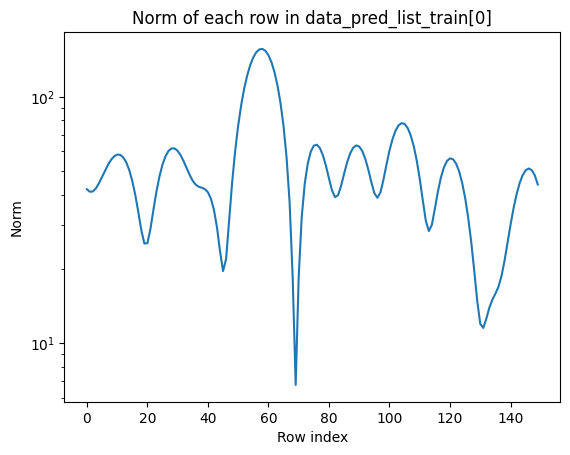

In [33]:
# data_pred_list_train[0][:, 0]
import matplotlib.pyplot as plt

norms = np.linalg.norm(data_pred_list_train[0], axis=1)
plt.plot(norms)
plt.xlabel('Row index')
plt.ylabel('Norm')
plt.yscale('log')
plt.title('Norm of each row in data_pred_list_train[0]')
plt.show()

In [32]:
print(norms)

[ 42.02044359  41.01423632  41.17570255  42.41153463  44.51357693
  47.19540306  50.13576278  53.01134196  55.51670633  57.37666219
  58.35593169  58.26864745  56.98857119  54.46059918  50.71497667
  45.88818801  40.26029588  34.33010176  28.95803855  25.50597452
  25.41324515  28.83913227  34.48478847  40.92743147  47.19628286
  52.68133268  56.99816543  59.91943702  61.3474046   61.30470961
  59.93194779  57.48586203  54.33251438  50.92616574  47.75787995
  45.25661062  43.65115548  42.85953801  42.49487634  41.99397683
  40.78052021  38.39005322  34.56001913  29.35428861  23.51320418
  19.49508405  21.8358982   31.28130118  44.71199895  60.06626188
  76.22307653  92.38040942 107.85002346 122.00542738 134.2774525
 144.1652422  151.25159518 155.21810977 155.85788327 153.08448806
 146.93648527 137.57708585 125.28890326 110.46404746  93.59026257
  75.23466821  56.02951314  36.67918716  18.1505974    6.70475164
  19.01440362  33.01436104  44.87332995  54.05800376  60.34984127
  63.704674